# **RED NEURONAL MONOCAPA - PERCEPTRÓN - COMPUERTA OR**

In [35]:
# Paso 1: Importar librerías
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')


In [36]:
# Paso 2: Clase Perceptron
class Perceptron:
    def __init__(self, eta=0.01, epochs=60):
        self.eta = eta          # Tasa de aprendizaje
        self.epochs = epochs    # Número de épocas
        self.w = None           # Pesos (se inicializan en fit)
        self.errors = []        # Errores por época (para graficar)

    def fit(self, X, y):
        # Inicializar pesos: [bias, w1, w2, ...]
        self.w = np.zeros(1 + X.shape[1])
        self.errors = []

        for epoch in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                # Predicción
                prediction = self.predict(xi)
                # Actualización
                update = self.eta * (target - prediction)
                self.w[1:] += update * xi
                self.w[0] += update
                errors += int(update != 0.0)  # Contar errores
            self.errors.append(errors)
        return self

    def net_input(self, X):
        # z = w·x + b
        return np.dot(X, self.w[1:]) + self.w[0]

    def predict(self, X):
        # f(z) = 1 si z >= 0, else 0
        return np.where(self.net_input(X) >= 0, 1, 0)


In [37]:
# Paso 3: Datos de la compuerta OR
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([0, 1, 1, 1])  # Salida OR

# Paso 4: Entrenar el perceptrón
ppn = Perceptron(eta=0.1, epochs=10)
ppn.fit(X, y)

# Paso 5: Mostrar pesos finales
print("Pesos finales:")
print(f"w1 = {ppn.w[1]:.3f}, w2 = {ppn.w[2]:.3f}, bias = {ppn.w[0]:.3f}")


Pesos finales:
w1 = 0.100, w2 = 0.100, bias = -0.100


In [38]:
# Paso 6: Predicciones
print("\nPredicciones:")
for xi, target in zip(X, y):
    pred = ppn.predict(xi)
    print(f"Entrada: {xi} → Predicción: {pred}, Real: {target}")



Predicciones:
Entrada: [0 0] → Predicción: 0, Real: 0
Entrada: [0 1] → Predicción: 1, Real: 1
Entrada: [1 0] → Predicción: 1, Real: 1
Entrada: [1 1] → Predicción: 1, Real: 1


In [39]:
# Paso 8: Graficar frontera de decisión (Función auxiliar)
def plot_decision_boundary(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx], marker=markers[idx], label=f'Clase {cl}')


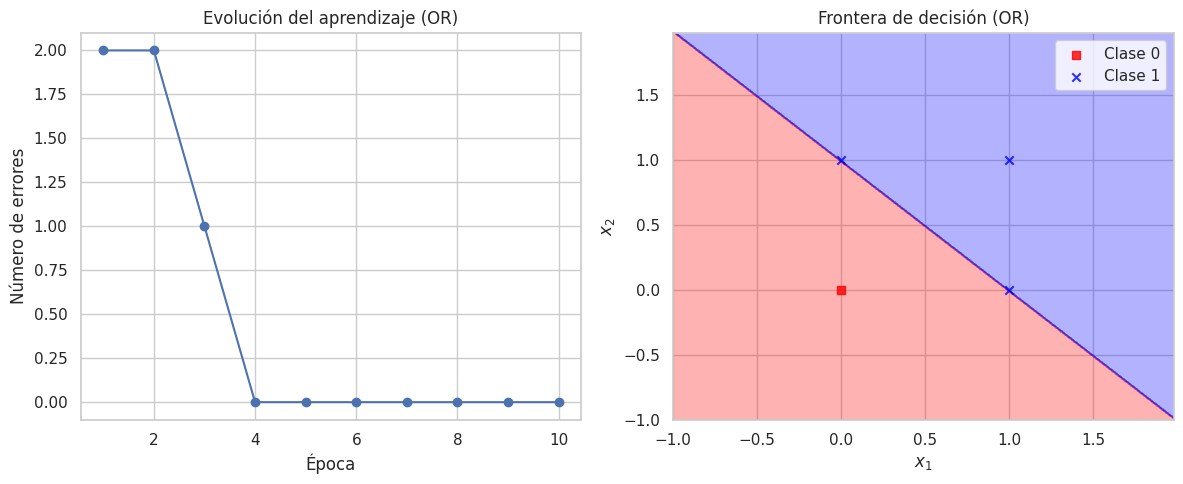

In [40]:
# Paso 7 y 8: Generación de gráficos
plt.figure(figsize=(12, 5))

# Gráfico 1: Evolución del error
plt.subplot(1, 2, 1)
plt.plot(range(1, len(ppn.errors) + 1), ppn.errors, marker='o')
plt.xlabel('Época')
plt.ylabel('Número de errores')
plt.title('Evolución del aprendizaje (OR)')
plt.grid(True)

# Gráfico 2: Frontera de decisión
plt.subplot(1, 2, 2)
# Se utiliza la función definida en el paso anterior
plot_decision_boundary(X, y, ppn)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Frontera de decisión (OR)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [42]:
# Paso 9: Probar puntos nuevos
print("\nPruebas con nuevos puntos:")
puntos_prueba = np.array([[0, 0], [0, 1]])
for punto in puntos_prueba:
    # Reshape es necesario para que la predicción funcione correctamente con un solo punto
    prediccion = ppn.predict(punto.reshape(1, -1))
    print(f"Punto {punto} → Predicción: {prediccion[0]}")



Pruebas con nuevos puntos:
Punto [0 0] → Predicción: 0
Punto [0 1] → Predicción: 1
